Table of Contents

- Library Import
- Data Import
- Data Security
- Analysis
- Data Export

# Library Import

In [2]:
#import the libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Data Import

In [3]:
#data folder
path = r'/Users/niphomkhwane/Documents/A_Data Analytics/Module 4 - Python/Instacart Basket Analysis/'

In [4]:
#import the merged data
all_data_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'all_data_merged.pkl'))

In [5]:
all_data_merged.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_time_order,product_id,add_to_cart_order,reordered,...,median_days_between_orders,frequent_buyer_flag,Gender,state,Age,date_joined,no_of_dependants,marital_status,income,_merge
0,2539329,1,1,2,8,NaN,True,196,1,0,...,20.5,Non-frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,False,196,1,1,...,20.5,Non-frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,False,196,1,1,...,20.5,Non-frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,False,196,1,1,...,20.5,Non-frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,False,196,1,1,...,20.5,Non-frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,both


In [6]:
all_data_merged.shape

(32404859, 31)

# Data Security

The data contained biographical information such as First and Last name, Age, State and Income. While this is personal information, it cannot really be used to identify the person. However, for this analysis I have decided to remove the First and Last name columns and they are not relevant for this analysis.

# Analysis

In [7]:
#Define the regions
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [8]:
# Create the 'region' column using df.loc
all_data_merged.loc[all_data_merged['state'].isin(Northeast), 'region'] = 'Northeast'
all_data_merged.loc[all_data_merged['state'].isin(Midwest), 'region'] = 'Midwest'
all_data_merged.loc[all_data_merged['state'].isin(South), 'region'] = 'South'
all_data_merged.loc[all_data_merged['state'].isin(West), 'region'] = 'West'

In [9]:
#Check the values added to the column and see if there are any null values
all_data_merged['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [10]:
spending_analysis = all_data_merged.groupby(['region', 'frequent_buyer_flag']) .agg({'frequent_buyer_flag': ['count']})

In [11]:
spending_analysis

frequent_buyer_flag
                                              count
region    frequent_buyer_flag                      
Midwest   Frequent_customer                 5017709
          Non-frequent_customer              863419
          Regular customer                  1716197
Northeast Frequent_customer                 3804566
          Non-frequent_customer              630182
          Regular customer                  1287988
South     Frequent_customer                 7192372
          Non-frequent_customer             1215088
          Regular customer                  2384420
West      Frequent_customer                 5545206
          Non-frequent_customer              927748
          Regular customer                  1819959

In [12]:
#determine low spenders
all_data_merged.loc[all_data_merged['order_number'] < 5]

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_time_order,product_id,add_to_cart_order,reordered,...,frequent_buyer_flag,Gender,state,Age,date_joined,no_of_dependants,marital_status,income,_merge,region
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Non-frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Non-frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
2,473747,1,3,3,12,21.0,False,196,1,1,...,Non-frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Non-frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
10,2539329,1,1,2,8,NaN,True,14084,2,0,...,Non-frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404832,2645700,106143,4,3,21,6.0,False,19675,1,1,...,Frequent_customer,Male,Hawaii,25,5/26/2017,0,single,53755,both,West
32404855,484769,66343,1,6,11,NaN,True,47210,1,0,...,Non-frequent_customer,Female,Tennessee,22,9/12/2017,3,married,46151,both,South
32404856,1561557,66343,2,1,11,30.0,False,47210,1,1,...,Non-frequent_customer,Female,Tennessee,22,9/12/2017,3,married,46151,both,South
32404857,276317,66343,3,6,15,19.0,False,47210,1,1,...,Non-frequent_customer,Female,Tennessee,22,9/12/2017,3,married,46151,both,South


In [13]:
#create the activity flag
all_data_merged.loc[all_data_merged['order_number'] < 5, 'purchase_activity'] = 'Low-activity customer'

In [14]:
all_data_merged.loc[all_data_merged['order_number'] >= 5, 'purchase_activity'] = 'High-activity customer'

In [15]:
#Check the values added to the column and see if there are any null values
all_data_merged['purchase_activity'].value_counts(dropna = False)

High-activity customer    24414877
Low-activity customer      7989982
Name: purchase_activity, dtype: int64

In [18]:
low_activity_customers = all_data_merged[all_data_merged['purchase_activity'] == 'Low-activity customer']

In [19]:
all_data_merged = all_data_merged[all_data_merged['purchase_activity'] != 'Low-activity customer']

In [20]:
all_data_merged.shape

(24414877, 33)

In [21]:
all_data_merged.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_time_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_label', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_spend',
       'spender_flag', 'median_days_between_orders', 'frequent_buyer_flag',
       'Gender', 'state', 'Age', 'date_joined', 'no_of_dependants',
       'marital_status', 'income', '_merge', 'region', 'purchase_activity'],
      dtype='object')

Text(0.5, 1.0, 'Relationship between Dependants and Income')

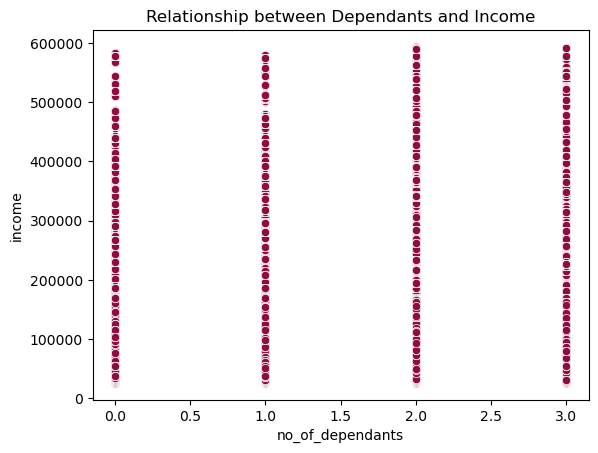

In [22]:
#creating a scatterplot to determine the relationship between dependants and income
dep_income = sns.scatterplot(x = 'no_of_dependants', y = 'income',data = all_data_merged, color = '#900C3F')
plt.title('Relationship between Dependants and Income')

Text(0.5, 1.0, 'Distribution of Age')

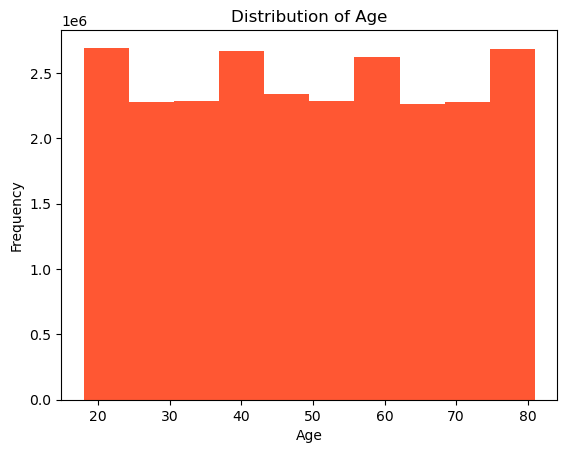

In [23]:
#Get distribution of Age
age_distribution = all_data_merged['Age'].plot.hist(bins = 10, color ='#ff5733')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

Text(0.5, 1.0, 'Distribution by No of Dependants')

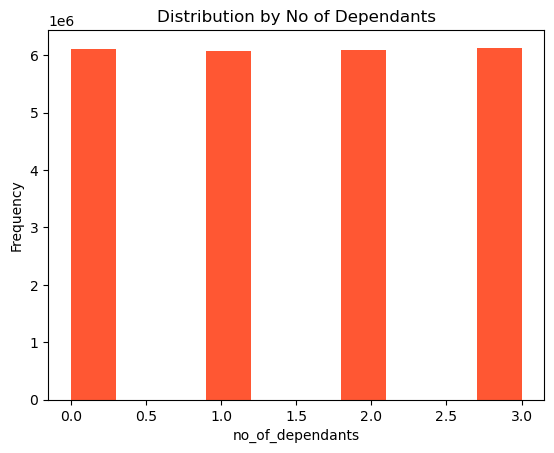

In [24]:
#Get distribution of no dependants
dependants_distribution = all_data_merged['no_of_dependants'].plot.hist(bins = 10, color ='#ff5733')
plt.xlabel('no_of_dependants')
plt.ylabel('Frequency')
plt.title('Distribution by No of Dependants')

Text(0.5, 1.0, 'Relationship between Orders Day of Week and Age')

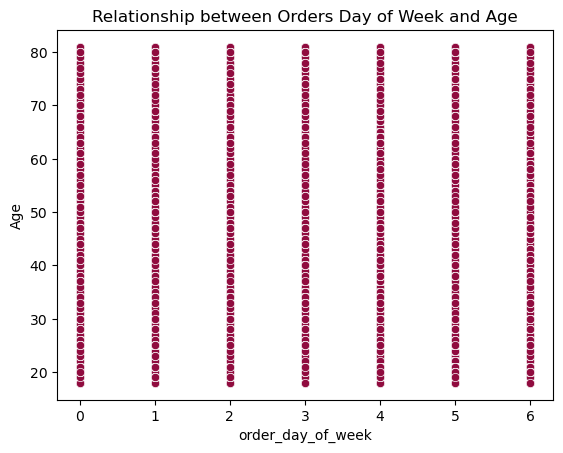

In [25]:
#creating a scatterplot to determine the relationship between orders DOW and Age
dow_age = sns.scatterplot(x = 'order_day_of_week', y = 'Age',data = all_data_merged, color = '#900C3F')
plt.title('Relationship between Orders Day of Week and Age')

Text(0.5, 1.0, 'Relationship between No of Dependants and Age')

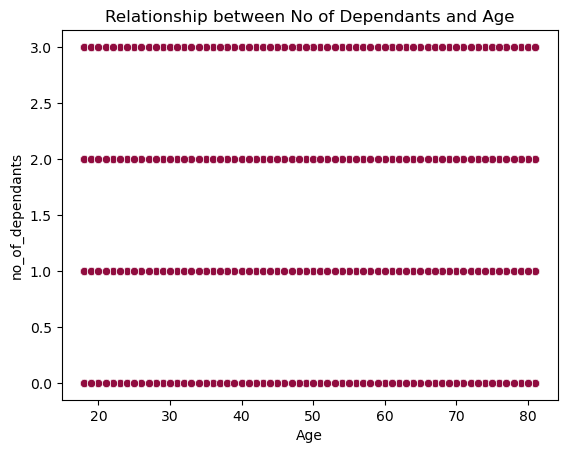

In [26]:
#creating a scatterplot to determine the relationship between Age and no dep
dow_age = sns.scatterplot(x = 'Age', y = 'no_of_dependants',data = all_data_merged, color = '#900C3F')
plt.title('Relationship between No of Dependants and Age')

In [27]:
all_data_merged['no_of_dependants'].describe()

count    2.441488e+07
mean     1.502001e+00
std      1.119171e+00
min      0.000000e+00
25%      0.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: no_of_dependants, dtype: float64

In [28]:
#check the average income level by no of dependants
ave_income_by_dependants = all_data_merged.groupby('no_of_dependants')['income'].mean()

In [29]:
ave_income_by_dependants

no_of_dependants
0    100179.559824
1     99649.445334
2     99875.088011
3     99875.242477
Name: income, dtype: float64

Text(0.5, 1.0, 'Average Income by Number of Dependants')

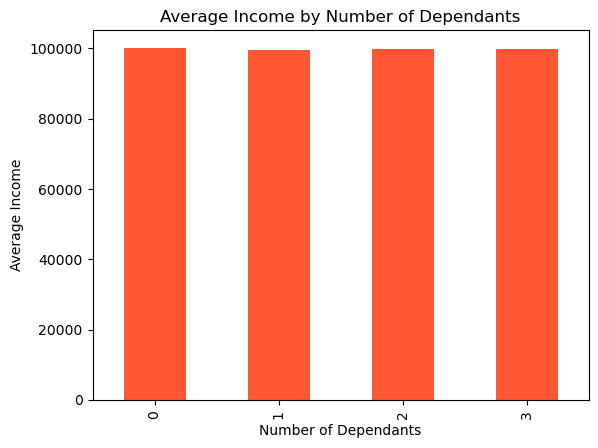

In [30]:
#visualise the income by number of dependants
ave_income_by_dependants.plot(kind='bar', color='#ff5733')
plt.xlabel('Number of Dependants')
plt.ylabel('Average Income')
plt.title('Average Income by Number of Dependants')

In [31]:
#check the spend by no of dependants
spend_dependants = all_data_merged.groupby('no_of_dependants')['prices'].mean()

In [32]:
spend_dependants

no_of_dependants
0    12.029888
1    11.510665
2    12.305462
3    11.468876
Name: prices, dtype: float64

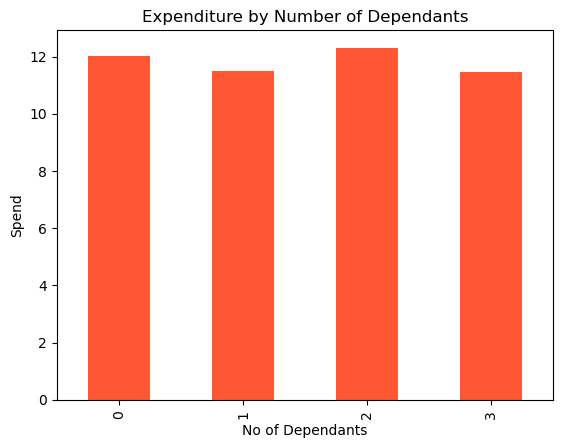

In [33]:
#visualise the spend
spend_dependants_bar = spend_dependants.plot.bar(color='#ff5733', title='Expenditure by Number of Dependants')
plt.xlabel('No of Dependants')
plt.ylabel('Spend')
plt.show()

In [34]:
#check the Age and income
age_income = all_data_merged.groupby('Age')['income'].mean()

In [35]:
age_income

Age
18     70811.794906
19     69958.756068
20     71294.637958
21     70897.402588
22     69896.375293
          ...      
77    117633.098160
78    118029.967716
79    115740.428254
80    114176.328236
81    115526.537132
Name: income, Length: 64, dtype: float64

I've decided to define 4 different customer profile and see how they are different:
1 Young Single Adult - aged 18-30 with 0 dependants
2 Older Sinlge Adult - aged > 30 with 0 dependants
3 Young Parent - aged 18-30 with > 0 dependants
4 Older Parent - aged > 30 with > 0 dependants

In [36]:
# Create criteria for each persona
all_data_merged.loc[(all_data_merged['Age'] >= 18) & (all_data_merged['Age'] <= 30) & (all_data_merged['no_of_dependants'] == 0), 'customer_persona'] = 'young_single_adult'

In [37]:
all_data_merged.loc[(all_data_merged['Age'] >= 18) & (all_data_merged['Age'] <= 30) & (all_data_merged['no_of_dependants'] > 0), 'customer_persona'] = 'young_parent'

In [38]:
all_data_merged.loc[(all_data_merged['Age'] > 30) & (all_data_merged['no_of_dependants'] > 0), 'customer_persona'] = 'older_parent'

In [39]:
all_data_merged.loc[(all_data_merged['Age'] > 30) & (all_data_merged['no_of_dependants'] == 0), 'customer_persona'] = 'older_single_adult'

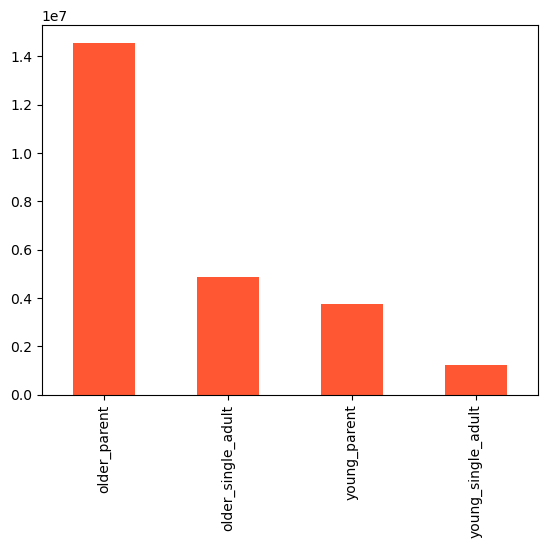

In [40]:
persona_distribution = all_data_merged['customer_persona'].value_counts().sort_index().plot.bar(color =['#ff5733'])

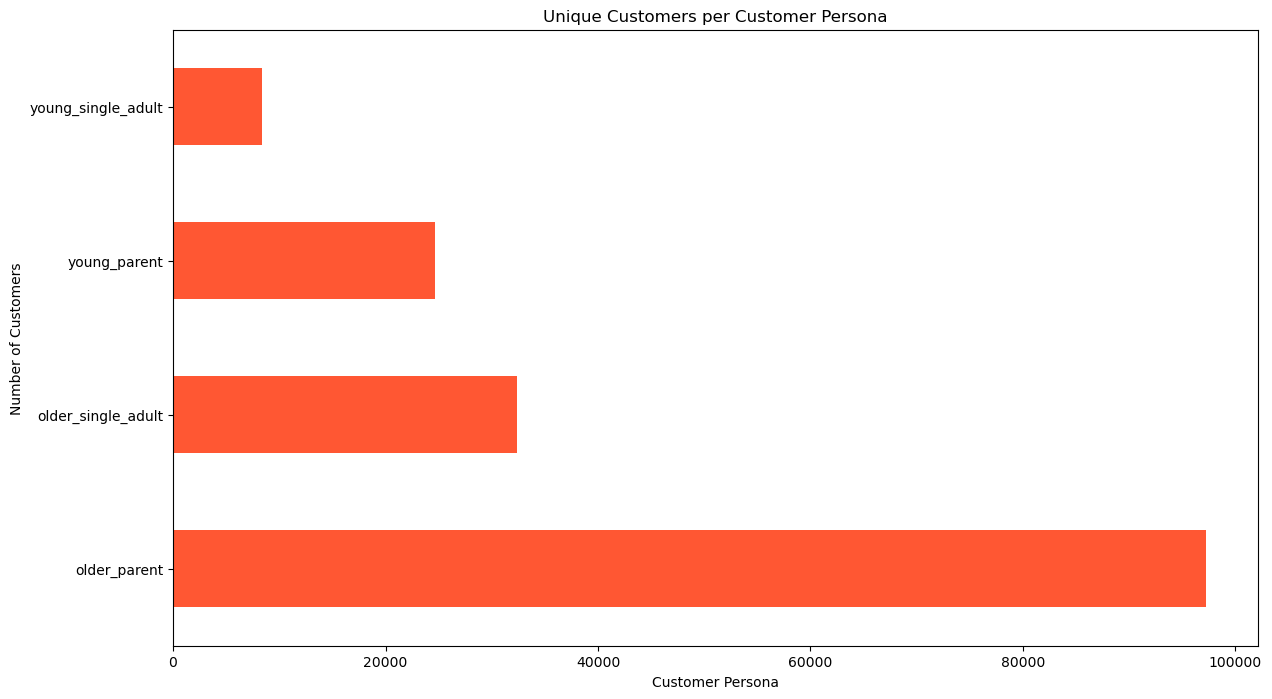

In [63]:
#obtain the unique customers
plt.figure(figsize=(14, 8))
unique_users = all_data_merged.groupby('customer_persona')['user_id'].nunique()
unique_users_bar = unique_users.plot.barh(color='#ff5733', title='Unique Customers per Customer Persona')
plt.xlabel('Customer Persona')
plt.ylabel('Number of Customers')
plt.show()

In [42]:
all_data_merged.groupby('customer_persona').agg({'median_days_between_orders': ['mean','min', 'max']})

median_days_between_orders           
                                         mean  min   max
customer_persona                                        
older_parent                         8.963451  0.0  30.0
older_single_adult                   8.891091  0.0  30.0
young_parent                         8.942285  0.0  30.0
young_single_adult                   9.086326  0.0  30.0

In [43]:
all_data_merged.groupby('customer_persona').agg({'prices': ['mean','min', 'max']})

prices              
                         mean  min      max
customer_persona                           
older_parent        11.738121  1.0  99999.0
older_single_adult  11.874116  1.0  99999.0
young_parent        11.851290  1.0  99999.0
young_single_adult  12.643598  1.0  99999.0

In [44]:
#Obtain a summary of the personas by region, income, spend and department_id
summary_by_region = all_data_merged.groupby(['region', 'customer_persona']).agg({
    'median_days_between_orders': 'mean','prices': 'mean', 'income': 'mean',
    'department_id': lambda x: x.mode()[0]  # Most frequent department
}).reset_index()

print(summary_by_region)

       region    customer_persona  median_days_between_orders     prices  \
0     Midwest        older_parent                    9.043602  12.312109   
1     Midwest  older_single_adult                    8.866241  11.922331   
2     Midwest        young_parent                    9.117419  14.411239   
3     Midwest  young_single_adult                    8.975731  19.434694   
4   Northeast        older_parent                    8.920357  11.449784   
5   Northeast  older_single_adult                    8.977999  12.011097   
6   Northeast        young_parent                    8.793700  10.547215   
7   Northeast  young_single_adult                    9.133097   8.906015   
8       South        older_parent                    8.967492  12.051388   
9       South  older_single_adult                    8.929687  12.646555   
10      South        young_parent                    8.860482  11.240078   
11      South  young_single_adult                    9.113536  12.678072   
12       Wes

/var/folders/2r/jyy262hj1gl0ql58ltnsw4rr0000gn/T/ipykernel_43638/1126469300.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_income = summary_by_region.pivot('region', 'customer_persona', 'income')
/var/folders/2r/jyy262hj1gl0ql58ltnsw4rr0000gn/T/ipykernel_43638/1126469300.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_spending = summary_by_region.pivot('region', 'customer_persona', 'prices')


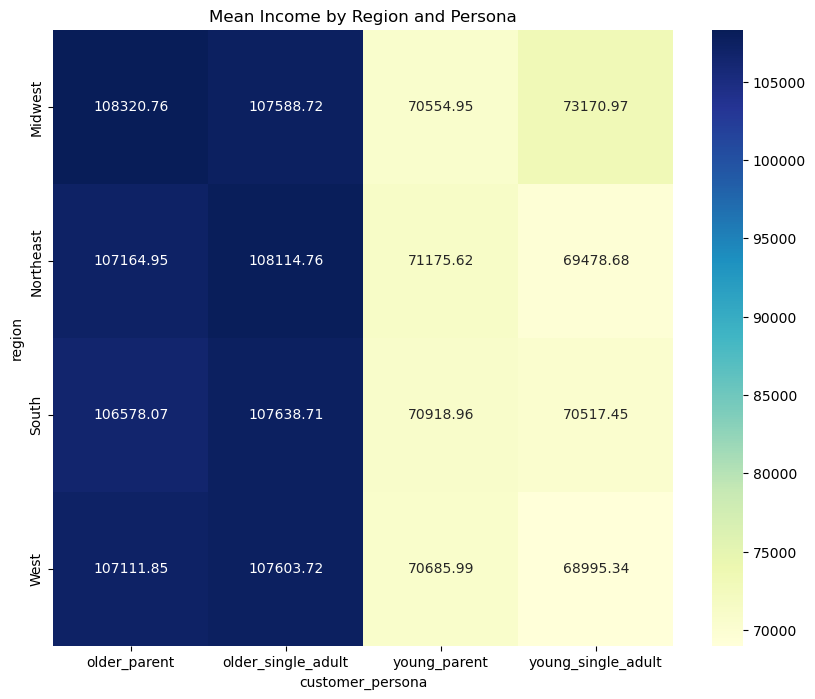

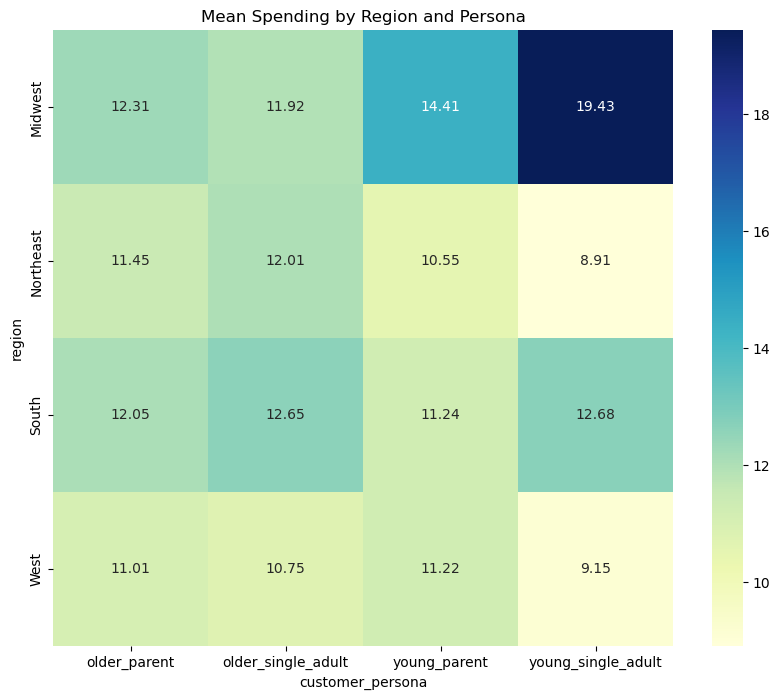

In [45]:
#Pivot the summary data for better visualisation
pivot_income = summary_by_region.pivot('region', 'customer_persona', 'income')
pivot_spending = summary_by_region.pivot('region', 'customer_persona', 'prices')

#Heatmap for Mean Income
plt.figure(figsize=(10, 8))
pivot_income = sns.heatmap(pivot_income, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Mean Income by Region and Persona')
plt.show()

#Heatmap for Mean Spending
plt.figure(figsize=(10, 8))
pivot_spend = sns.heatmap(pivot_spending, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Mean Spending by Region and Persona')
plt.show()

In [46]:
all_data_merged.shape


(24414877, 34)

In [47]:
all_data_merged.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_time_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_label', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_spend',
       'spender_flag', 'median_days_between_orders', 'frequent_buyer_flag',
       'Gender', 'state', 'Age', 'date_joined', 'no_of_dependants',
       'marital_status', 'income', '_merge', 'region', 'purchase_activity',
       'customer_persona'],
      dtype='object')

In [48]:
#obtain the unique customers
price_label_count = all_data_merged['price_label'].value_counts()

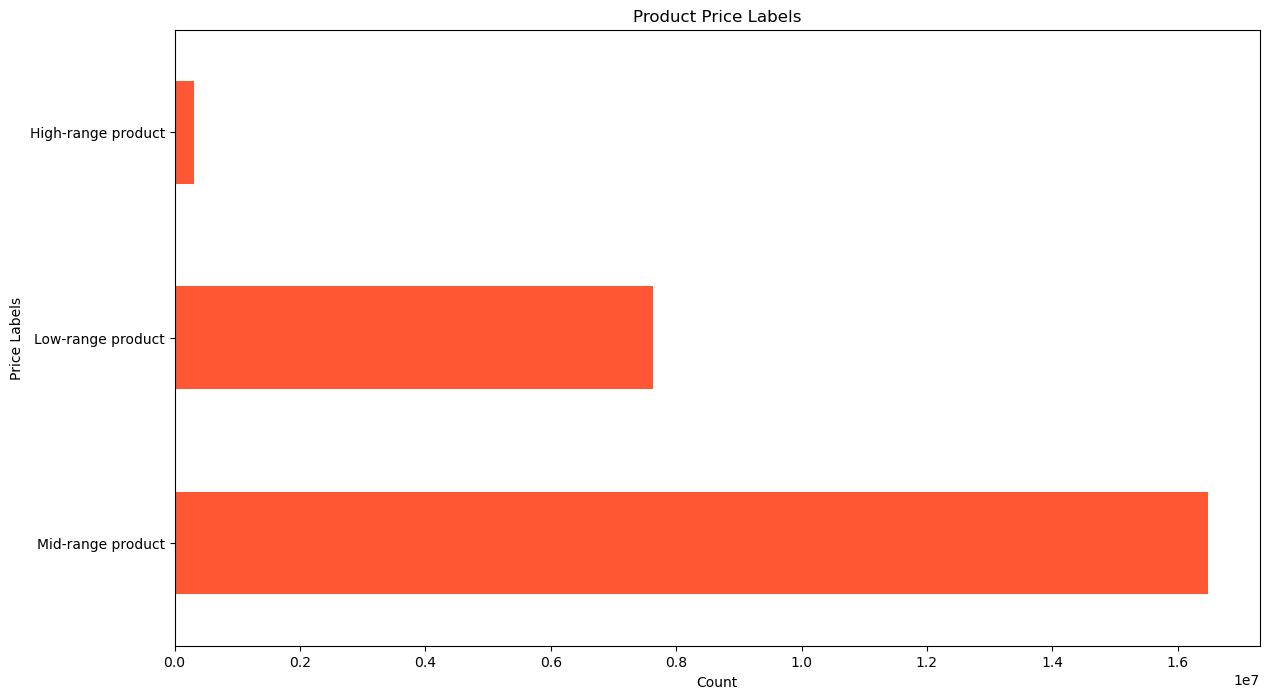

In [49]:
plt.figure(figsize=(14, 8))
price_label_bar = price_label_count.plot.barh(color='#ff5733', title='Product Price Labels')
plt.xlabel('Count')
plt.ylabel('Price Labels')
plt.show()

In [55]:
#check the popular departments by number of orders
department_analysis = all_data_merged.groupby(['department_id']) .agg({'order_id': ['count']})

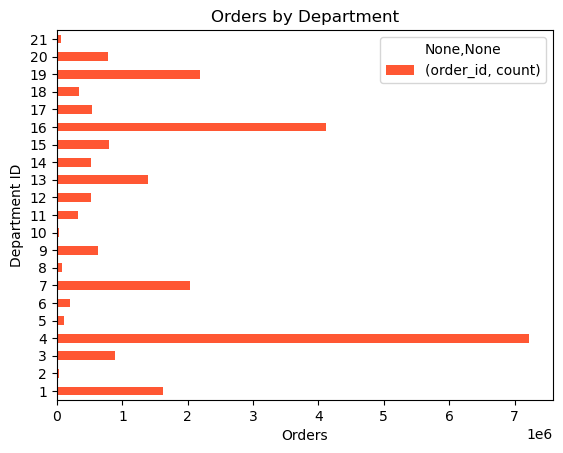

In [51]:
department_analysis_bar = department_analysis.plot.barh(color='#ff5733', title='Orders by Department')
plt.xlabel('Orders')
plt.ylabel('Department ID')
plt.show()

In [52]:
#upload departments data
departments = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'departments.csv'), sep=';')
departments.shape

(21, 2)

In [59]:
#merge the department to obtain the department name. No sure how the department was lost in the data wrangling

all_data_merged = all_data_merged.merge(departments, on = 'department_id', indicator = False)
all_data_merged.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_time_order,product_id,add_to_cart_order,reordered,...,Age,date_joined,no_of_dependants,marital_status,income,_merge,region,purchase_activity,customer_persona,department
0,431534,1,5,4,15,28.0,False,196,1,1,...,31,2/17/2019,3,married,40423,both,South,High-activity customer,older_parent,beverages
1,3367565,1,6,2,7,19.0,False,196,1,1,...,31,2/17/2019,3,married,40423,both,South,High-activity customer,older_parent,beverages
2,550135,1,7,1,9,20.0,False,196,1,1,...,31,2/17/2019,3,married,40423,both,South,High-activity customer,older_parent,beverages
3,3108588,1,8,1,14,14.0,False,196,2,1,...,31,2/17/2019,3,married,40423,both,South,High-activity customer,older_parent,beverages
4,2295261,1,9,1,16,0.0,False,196,4,1,...,31,2/17/2019,3,married,40423,both,South,High-activity customer,older_parent,beverages


In [60]:
department_analysis = all_data_merged.groupby(['department']) .agg({'order_id': ['count']})

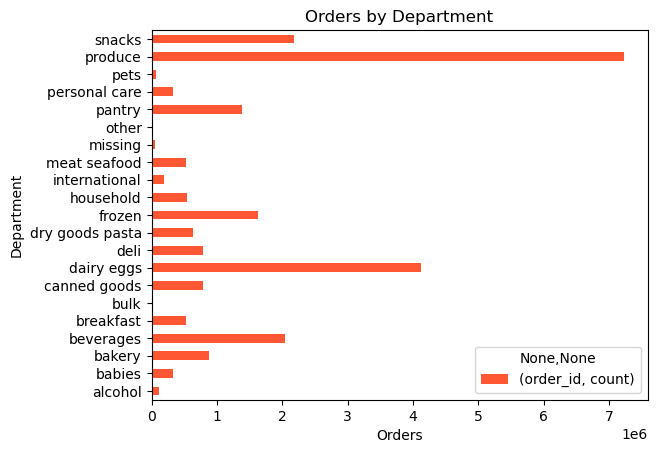

In [61]:
department_name_orders_bar = department_analysis.plot.barh(color='#ff5733', title='Orders by Department')
plt.xlabel('Orders')
plt.ylabel('Department')
plt.show()

In [65]:
all_data_merged.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_time_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_label', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_spend',
       'spender_flag', 'median_days_between_orders', 'frequent_buyer_flag',
       'Gender', 'state', 'Age', 'date_joined', 'no_of_dependants',
       'marital_status', 'income', '_merge', 'region', 'purchase_activity',
       'customer_persona', 'department'],
      dtype='object')

In [69]:
#Get distribution of Loyalty Status

Text(0.5, 1.0, 'Distribution of Loyalty Status')

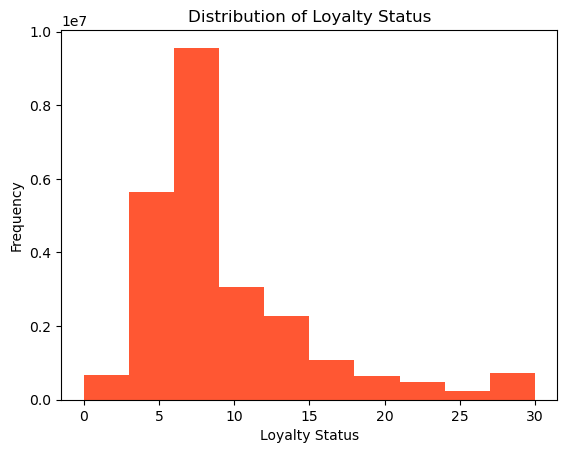

In [71]:
loyalty_distribution = all_data_merged['median_days_between_orders'].plot.hist(bins = 10, color ='#ff5733')
plt.xlabel('Loyalty Status')
plt.ylabel('Frequency')
plt.title('Distribution of Loyalty Status')

In [84]:
persona_analysis = all_data_merged.groupby(['customer_persona']) .agg({'days_since_prior_order':'mean'})
print(persona_analysis)

                    days_since_prior_order
customer_persona                          
older_parent                     10.092853
older_single_adult               10.023521
young_parent                     10.090941
young_single_adult               10.221284


<Figure size 1400x800 with 0 Axes>

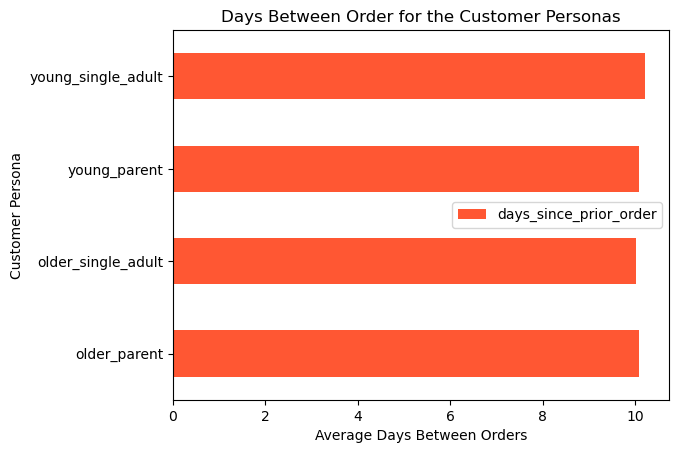

In [85]:
#Get the how the personas purchase orders
plt.figure(figsize=(14, 8))

persona_purchase_habit = persona_analysis.plot.barh(color='#ff5733', title='Days Between Order for the Customer Personas')
plt.xlabel('Average Days Between Orders')
plt.ylabel('Customer Persona')
plt.show()

In [87]:
#check regional diffences
regional_analysis = all_data_merged.groupby(['region']) .agg({'days_since_prior_order':'mean'})
print(regional_analysis)

           days_since_prior_order
region                           
Midwest                 10.175677
Northeast               10.050167
South                   10.084805
West                    10.027432


<Figure size 1400x800 with 0 Axes>

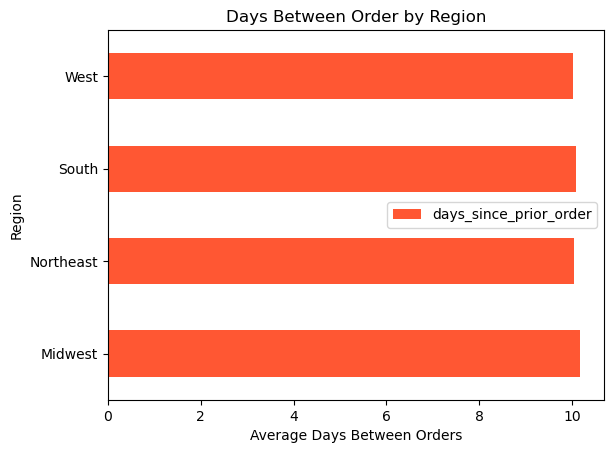

In [88]:
#plot the chart
plt.figure(figsize=(14, 8))

regional_purchase_habit = regional_analysis.plot.barh(color='#ff5733', title='Days Between Order by Region')
plt.xlabel('Average Days Between Orders')
plt.ylabel('Region')
plt.show()

In [90]:
#regional differences in spend
regional_analysis_price = all_data_merged.groupby(['region']) .agg({'prices':'mean'})
print(regional_analysis_price)

              prices
region              
Midwest    12.901029
Northeast  11.290229
South      12.077412
West       10.897110


<Figure size 1400x800 with 0 Axes>

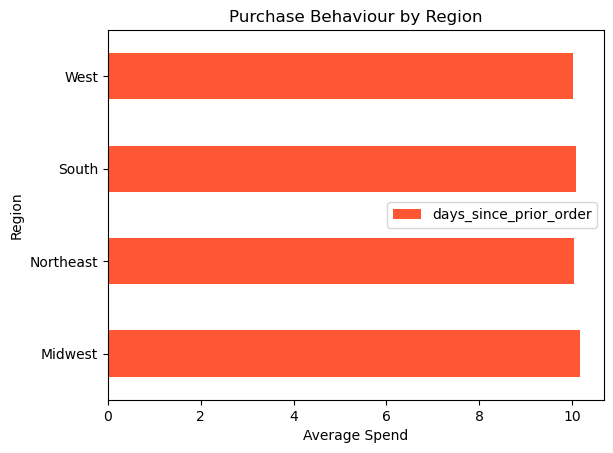

In [93]:
#plot the chart
plt.figure(figsize=(14, 8))

regional_spend_habit = regional_analysis.plot.barh(color='#ff5733', title='Purchase Behaviour by Region')
plt.xlabel('Average Spend')
plt.ylabel('Region')
plt.show()

In [95]:
#check what the difference between the personas and spend
regional_analysis_persona = all_data_merged.groupby(['customer_persona']) .agg({'prices':'mean'})
print(regional_analysis_persona)

                       prices
customer_persona             
older_parent        11.738121
older_single_adult  11.874116
young_parent        11.851290
young_single_adult  12.643598


In [96]:
age_family_status = all_data_merged.groupby(['Age', 'no_of_dependants']) .agg({'prices':'mean'})
print(age_family_status)

                         prices
Age no_of_dependants           
18  0                 13.923011
    1                 10.011346
    2                 10.048497
    3                 11.205861
19  0                 11.352857
...                         ...
80  3                  9.838075
81  0                  9.693703
    1                 10.447830
    2                  8.599522
    3                  9.546674

[256 rows x 1 columns]


In [99]:
#check how orders differ between the personas
orders_count_age = all_data_merged.groupby(['customer_persona']) .agg({'order_id':'count'})
print(orders_count_age)

                    order_id
customer_persona            
older_parent        14575051
older_single_adult   4869117
young_parent         3734824
young_single_adult   1235885


<Figure size 1400x800 with 0 Axes>

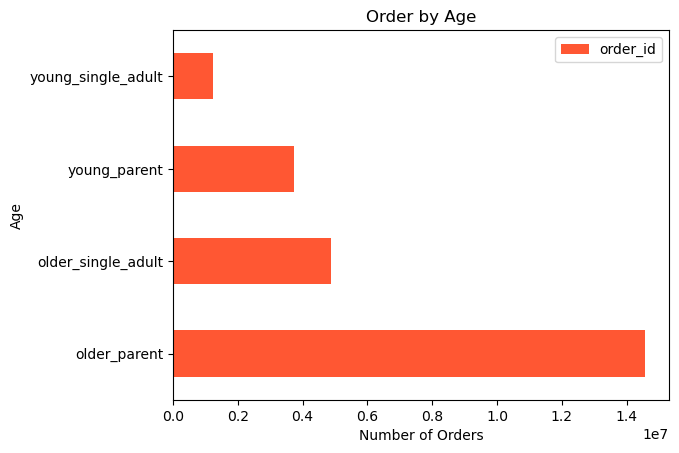

In [100]:
#plot the chart
plt.figure(figsize=(14, 8))

orders_count_age_bar = orders_count_age.plot.barh(color='#ff5733', title='Order by Age')
plt.xlabel('Number of Orders')
plt.ylabel('Age')
plt.show()

In [102]:
spend_persona = all_data_merged.groupby(['customer_persona']) .agg({'prices':'mean'})
print(spend_persona)

                       prices
customer_persona             
older_parent        11.738121
older_single_adult  11.874116
young_parent        11.851290
young_single_adult  12.643598


# Export Visualisations

In [ ]:
#download the Spend by no of dependants chart
spend_dependants_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'spend_dependants_bar.png'))

In [64]:
#download the Customer persona
unique_users_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'customer_persona_distribution.png'))

In [ ]:
#download the income heat chart
pivot_income.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'pivot_income.png'))

In [ ]:
#download the spend heat chart
pivot_spend.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'pivot_spend.png'))

In [ ]:
#download the price label chart
price_label_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'price_label.png'))

In [62]:
#download the department orders chart
department_name_orders_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'department_orders.png'))

In [72]:
#download the loyalty distribution chart
loyalty_distribution.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'loyalty_distribution.png'))

In [86]:
#download the persona purchase chart
persona_purchase_habit.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'purchase_personas.png'))

In [94]:
#download the regional purchase chart
regional_spend_habit.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'regional_purchase_habit.png'))

In [101]:
#download the orders by persona chart
orders_count_age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'orders_persona.png'))

# Data Export

In [103]:
#export the subset low-activity customers
low_activity_customers.to_csv(os.path.join(path, '02 Data','Prepared Data', 'Low-activity_customers.csv'))

In [104]:
#export the data into a pickle format
all_data_merged.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'final_data.pkl'))